<a href="https://www.kaggle.com/code/huienngu/car-resale-value-prediction-ml-random-forest-r?scriptVersionId=126635185" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Introduction**
* 78% automative companies invest in machine learning to regularly improve their user experience
* Autonomous cars: Tesla - self-driving features in cars, complex computer vision algorithms and sensors are relied to gain full control over roads.
* Real-time car parking: Smart parking system
* Preventive maintenance indicator: keep track of car maintenance for oil level, coolant level, air filter cleaning and optimum tire pressure
* Root cause analysis: car servicing company use machine learning based system for root cause analysis of car break-down events

**Problem statement**
* Predict price of used cars
* Model should take car-related parameters and output a selling price based on the features of fuel type, manufcaturing year, miles driven, number of historical owners, maintenance record

* Supervised learning problem
* Can be solved using regression techniques 

**Why choose Random Forest Regressor**
* Data containes outliers
* Nonlinear regression models is insensitive to outliers

# **Data analysis**
* 8,128 used car

In [1]:
import pandas as pd
cars = pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
cars.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [2]:
cars['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

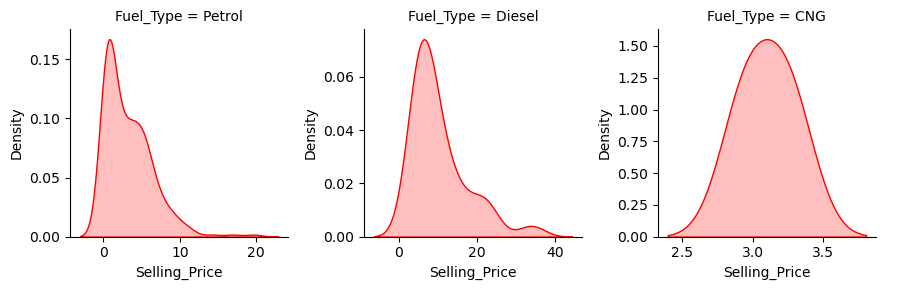

In [3]:
import seaborn as sns

g = sns.FacetGrid(cars, col="Fuel_Type", sharex=False, sharey=False)
g.map(sns.kdeplot, "Selling_Price", color="red", fill=True)
g.add_legend()

Diesel fuel types are generally more expensive than pertrol cars. Gas fuel-types cars are relatively cheaper. 

<AxesSubplot:>

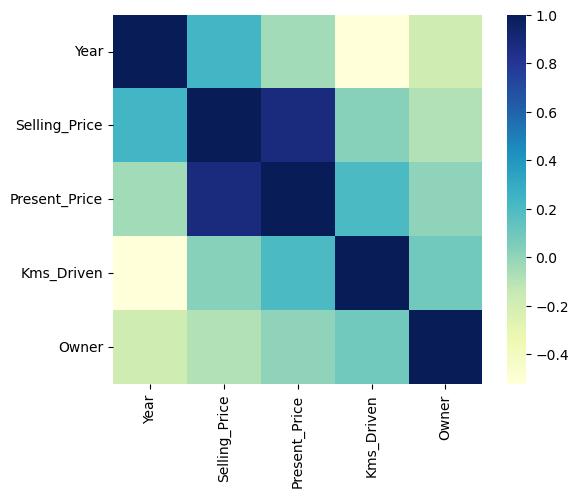

In [4]:
#correlation matrix
sns.heatmap(data=cars.corr(),cmap='YlGnBu',square=True)

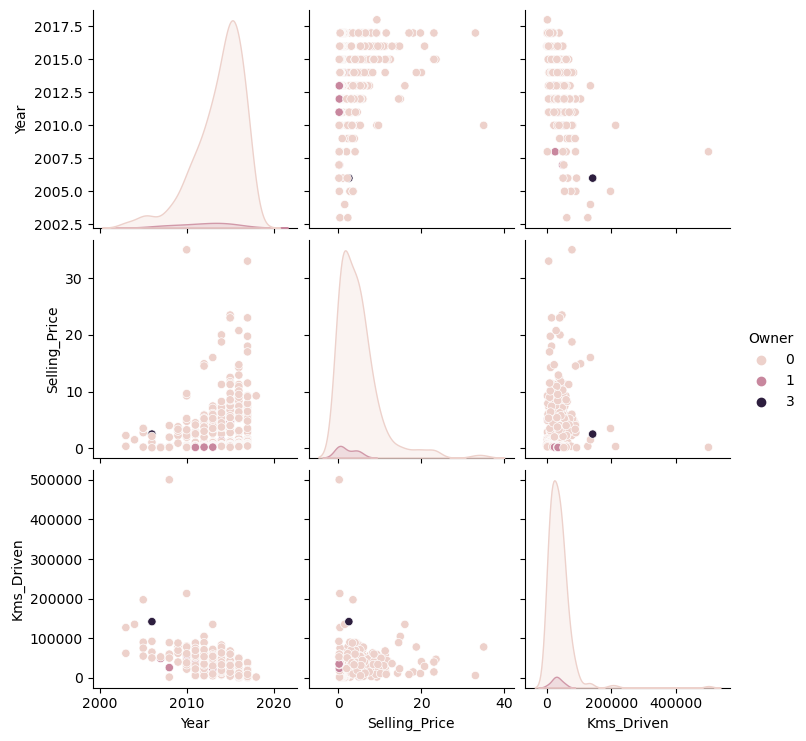

In [5]:
#pair plot
sns.pairplot(cars[["Year","Selling_Price","Kms_Driven","Fuel_Type","Transmission","Owner"]],hue="Owner")

# **Machine learning model**

In [6]:
# Select features and target variables
target = cars['Selling_Price']
features = cars[cars.columns.difference(['Selling_Price'])]

# Encode categorical variables using one-hot encoding
features_encoded = pd.get_dummies(features)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features_encoded, target, test_size=0.3)

# Create a random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Fit the model over the training set
rf.fit(X_train, Y_train)

# Evaluate the model's performance over the testing set
rf_confidence = rf.score(X_test, Y_test)
print("rf confidence: ", rf_confidence)


rf confidence:  0.952997829685248


# **Performance evaluation**

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


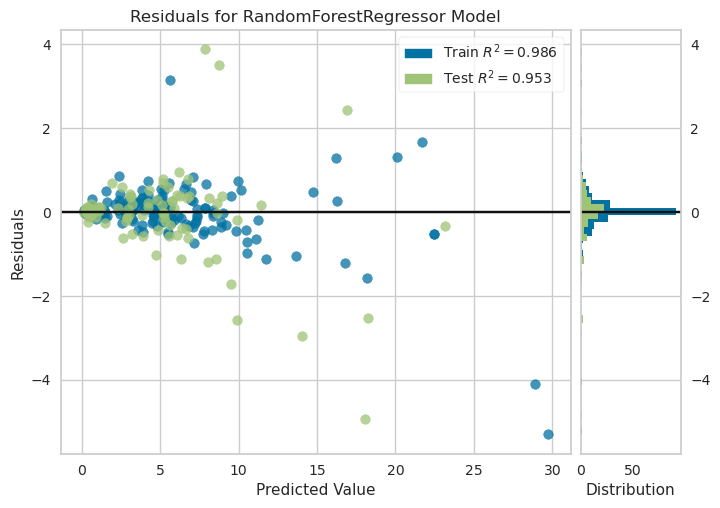

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [7]:
#residuals
from yellowbrick.regressor import ResidualsPlot


visualizer = ResidualsPlot(rf)
visualizer.fit(X_train,Y_train)
visualizer.score(X_test,Y_test)
visualizer.show()
